# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

## Very Deep Convolutional Networks (VGG)

Estas redes convolucionales llamadas *Very Deep Convolutional Networks for Large-Scale Image Recognition* fueron presentadas en el paper:

- Simonyan, K. y Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. International Conference on Learning Representations - ICLR 2015.

En este trabajo se investigó el efecto de la profundidad de la red convolucional sobre su precisión en el ajuste de reconocimiento de imagenes a gran escala. La contribución es una evaluación exhaustiva de las redes de profundidad creciente utilizando una arquitectura con filtros convolucionales muy pequeños (3x3), lo que demuestra que se puede lograr una mejora significativa en las configuraciones previas si se aumenta la profundidad a 16-19 capas de pesos.

Es una de las primeras redes profundas más conocidas.

Las redes neuronales convolucionales son muy potentes para todo lo que tiene que ver con el análisis de imágenes, debido a que son capaces de detectar características simples como por ejemplo detención de bordes, lineas, etc y componer en características más complejas hasta detectar lo que se busca.

### Modelo y especificaciones

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig21.png')

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig22.png')

Realizaremos el mismo experimento que en las partes anteriores, así que los siguientes pasos son: importar el dataset de CIFAR-100, hacer la configuración básica del entorno del experimento e importar las librerías de Python:

### Importando las librerías necesarias

In [2]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

Using TensorFlow backend.


### Preparando el conjunto de datos

Como antes, usaremos el conjunto de datos CIFAR-100, que, como ya dijimos, consta de 600 imágenes por cada clase de un total de 100 clases. Se divide en 500 imágenes para entrenamiento y 100 imágenes para validación por cada clase. Las 100 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta *fina* (la clase, de entre las 100, a la que pertenece) y una etiqueta *gruesa* (correspondiente a su superclase):

In [3]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step


Como antes hasta este punto hemos descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veíamos que la forma de *y_train_original* era la siguiente:

In [4]:
y_train_original.shape

(50000, 1)

In [5]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

Así que, inicialmente, había que convertirlo en su versión **one-hot-encoding**:

In [0]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [7]:
y_train.shape

(50000, 100)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

El siguiente paso era ver los datos de entrenamiento (x_train_original):

In [9]:
x_train_original.shape

(50000, 32, 32, 3)

In [10]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Representa la imagen en los 3 canales RGB de 256 píxeles. Nuevamente vamos a ver una, la última por ejemplo:

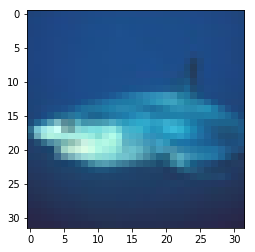

In [11]:
imgplot = plt.imshow(x_train_original[49999])
plt.show()

### Preparando el entorno

Especificábamos la situación de los canales de las imágenes y la fase del experimento. Nuevamente especificar a Keras dónde se encuentran los canales. En un array de imagenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (*channels firs*t) o canales al final (*channels last*). En nuestro caso, vamos a definirlos al final. El parámetro *image_data_format* afecta la forma en que cada uno de los frameworks trata las dimensiones de los datos. Específicamente, define dónde está la dimensión de los canales en los datos de entrada. Para Tensorflow o CNTK debe ser *channels_last*, para Theano debería ser *channels_first*.

In [12]:
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

W0705 02:51:32.641362 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:153: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Arquitectura de la red: Red neuronal convolucional VGG-16

Keras tiene a nuestra disposición tanto la arquitectura VGG-16 como la VGG-19. Vamos a entrenar ambas y una más que explicaremos en breve. Debido a que vamos a usar la definida en Keras debemos aumentar el tamaño de las imágenes a 48X48 píxeles. Para ello, usaremos el siguiente código:

In [0]:
def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 48, 48, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

Lo que hacíamos a continuación, era normalizar las imágenes dividiéndo cada elemento por el numero de píxeles, es decir, 255. Con lo que obteníamos el array con valores de entre 0 y 1:

In [0]:
x_train_resized = resize_data(x_train_original)
x_test_resized = resize_data(x_test_original)
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

Con esto, tenemos las imágenes a 48X48 píxeles normalizadas en *x_train_resized* y *x_test_resized*.

In [15]:
x_train_resized.shape

(50000, 48, 48, 3)

In [16]:
x_train_resized[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.84705882, 0.89411765, 0.82745098],
        [0.79215686, 0.84313725, 0.75294118],
        [0.71372549, 0.76470588, 0.65882353]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.72941176, 0.76470588, 0.6627451 ],
        [0.69411765, 0.72941176, 0.60392157],
        [0.64705882, 0.68235294, 0.54901961]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.63137255, 0.65490196, 0.50196078],
        [0.57647059, 0.60784314, 0.43921569],
        [0.54117647, 0.57254902, 0.40392157]],

       ...,

       [[0.50588235, 0.64313725, 0.27843137],
        [0.49803922, 0.63529412, 0.25098039],
        [0.49411765, 0

### Preparando el entorno

Como dijimos antes, entrenaremos los modelos VGG-16, VGG-19 y uno más especificado por nosotros (nuestra propia versión de VGG) con objeto de no tener que modificar el tamaño de las imágenes. Empezaremos entrenando VGG-16, veremos resultados y continuaremos con VGG-19 para terminar con nuestro VGG personalizado.

#### VGG-16

In [0]:
from keras.applications import vgg16

def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)

  return model

Los parámetros de esta función son los siguientes:
- *include_top*: Especifica si debe incluir las 3 capas completamente conectadas en la parte superior de la red.
- *weights*: Un valor entre None (inicialización aleatoria) o 'imagenet' (pre-entrenado en ImageNet).
- *input_tensor*: Tensor Keras opcional (es decir, salida de layers.Input()) para utilizarlo como entrada de imagen para el modelo.
- *input_shape*: Opcional tuple con forma, sólo se especificará si include_top es False (de lo contrario, la forma de entrada debe ser (224, 224, 3) (con formato de datos "channels_last") o (3, 224, 224) (con formato de datos "channels_first"). Debe tener exactamente 3 canales de entrada, y el ancho y la altura no deben ser menores de 32. 
- *pooling*: Modo de agrupación opcional para la extracción de características cuando *include_top* es False.
    - *None* significa que la salida del modelo será la salida del tensor 4D de la última capa convolucional.
    - *avg* significa que la agrupación media global se aplicará a la salida de la última capa convolucional y, por lo tanto, la salida del modelo será un tensor 2D.
    - *max* significa que se aplicará el Global Max Pooling.
- *classes*: Número opcional de clases en las que clasificar las imágenes, sólo se especificará si include_top es True, y si no se especifica ningún argumento de pesos.

Vamos a incluir una red neuronal densa al final con el parámetro *include_top*. No cargamos ningún modelo entrenado a priori con el parámetro *weights*. No especificamos ningún tensor de keras como entrada con *input_tensor*. Definimos la forma de los datos de entrada con *input_shape*, No especificamos *Pooling* final con *pooling* y definimos el número de clases final con *classes*.

Una vez definido el modelo, lo compilamos especificando la función de optimización, la de coste o pérdida y las métricas que usaremos. En este caso, como en los ejercicios anteriores, usaremos la función de optimización *stochactic gradient descent*, la función de pérdida *categorical cross entropy* y, para las métricas, *accuracy* y *mse* (media de los errores cuadráticos).

In [18]:
vgg16_model = create_vgg16()  
vgg16_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

W0705 02:52:17.301367 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 02:52:17.315635 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 02:52:17.360858 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0705 02:52:17.588163 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 02:52:17.616043 140534958884736 deprecation_wrapper.py:119] From /us

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [19]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

Ahora el número de parámetros ha crecido sustancialmente (34 millones). Ahora sólo queda entrenar:

In [20]:
vgg16 = vgg16_model.fit(x=x_train_resized, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test_resized, y_test), shuffle=True)

W0705 02:52:36.351253 140534958884736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 02:52:36.506162 140534958884736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 179s 4ms/step - loss: 4.6053 - acc: 0.0088 - mean_squared_error: 0.0099 - val_loss: 4.6050 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 175s 3ms/step - loss: 4.6052 - acc: 0.0117 - mean_squared_error: 0.0099 - val_loss: 4.6049 - val_acc: 0.0158 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 174s 3ms/step - loss: 4.6049 - acc: 0.0151 - mean_squared_error: 0.0099 - val_loss: 4.6044 - val_acc: 0.0173 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 174s 3ms/step - loss: 4.6041 - acc: 0.0161 - mean_squared_error: 0.0099 - val_loss: 4.6030 - val_acc: 0.0256 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 170s 3ms/step - loss: 4.6010 - acc: 0.0219 - mean_squared_error: 0.0099 - val_loss: 4.5972 -

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

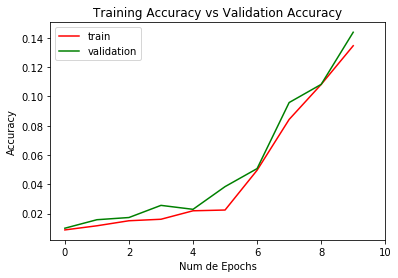

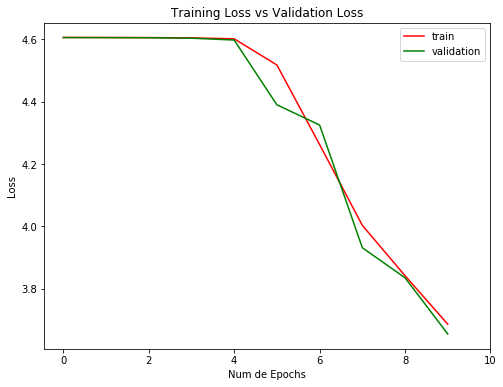

In [21]:
plt.figure(0)
plt.plot(vgg16.history['acc'],'r')  
plt.plot(vgg16.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg16.history['loss'],'r')  
plt.plot(vgg16.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

La generalización mejora a un 1% aproximadamente respecto a la red convolucional del experimento anterior, si bien, después de 10 epochs no han mejorado realmente las métricas.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

In [22]:
vgg16_pred = vgg16_model.predict(x_test_resized, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16_pred, axis=1)

10000/10000 [==============================] - 10s 985us/step


Como ya hiciéramos en la primera parte, vamos a dar como predicha el mayor valor de la predicción. Lo normal es dar un valor mínimo o bias que defina un resultado como positivo, pero en este caso, lo vamos a hacer simple.

Con la librería Scikit Learn, generamos la matriz de confusión y la dibujamos (aunque el gráfico no es muy bueno debido al numero de etiquetas).

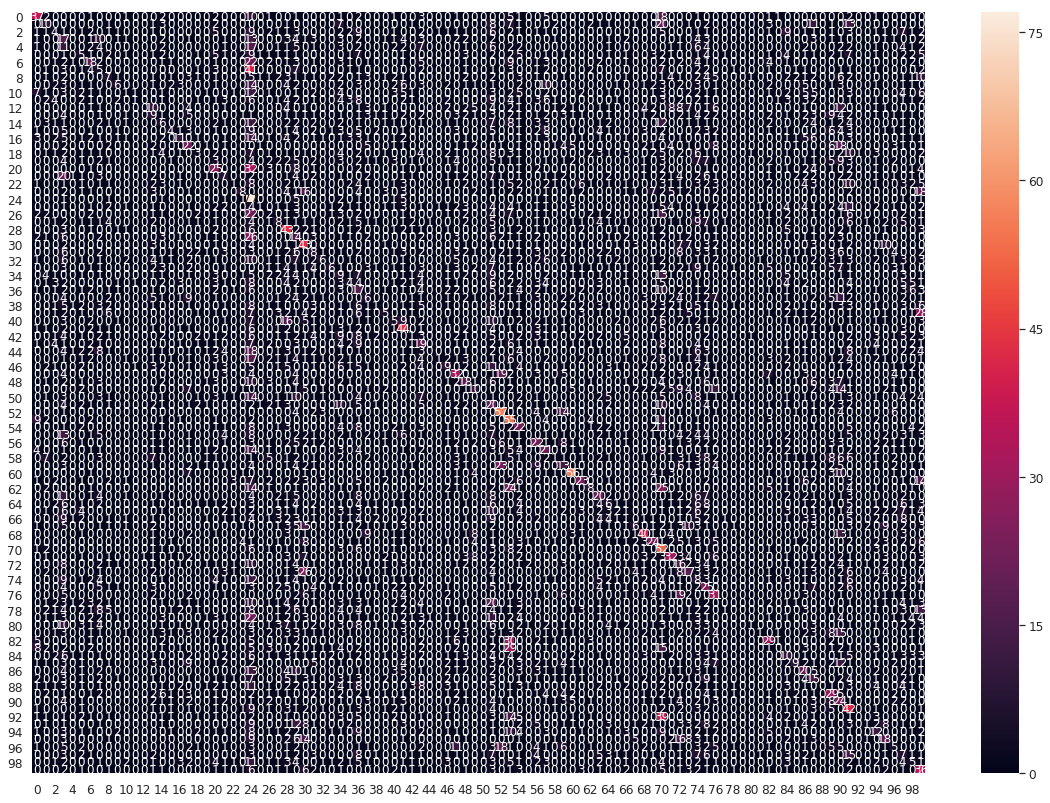

In [23]:
# Creamos la matriz de confusión
vgg16_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg16_predicted)

# Visualiamos la matriz de confusión
vgg16_df_cm = pd.DataFrame(vgg16_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.1) # Tamaño fuente de las etiquetas 
sn.heatmap(vgg16_df_cm, annot=True, annot_kws={"size": 12}) # Tamaño fuente  
plt.show()

Y por último, mostramos las métricas:

In [24]:
vgg16_report = classification_report(np.argmax(y_test, axis=1), vgg16_predicted)  
print(vgg16_report)

              precision    recall  f1-score   support

           0       0.38      0.37      0.38       100
           1       0.16      0.10      0.12       100
           2       0.10      0.04      0.06       100
           3       0.05      0.17      0.08       100
           4       0.00      0.00      0.00       100
           5       0.07      0.05      0.06       100
           6       0.22      0.18      0.20       100
           7       0.04      0.05      0.05       100
           8       0.12      0.07      0.09       100
           9       0.26      0.06      0.10       100
          10       0.05      0.01      0.02       100
          11       0.25      0.01      0.02       100
          12       0.00      0.00      0.00       100
          13       0.08      0.09      0.09       100
          14       0.07      0.06      0.07       100
          15       0.19      0.04      0.07       100
          16       0.28      0.11      0.16       100
          17       0.19    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC para clasificación multiclase.

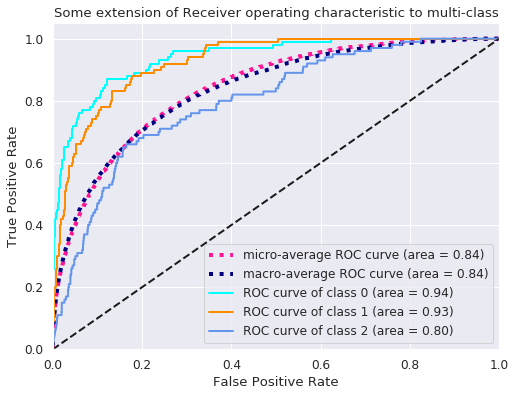

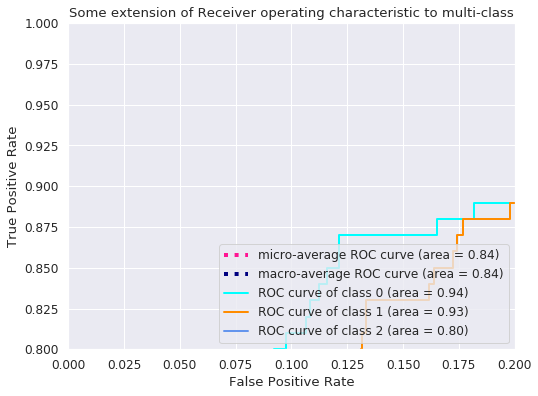

In [25]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg16_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg16_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

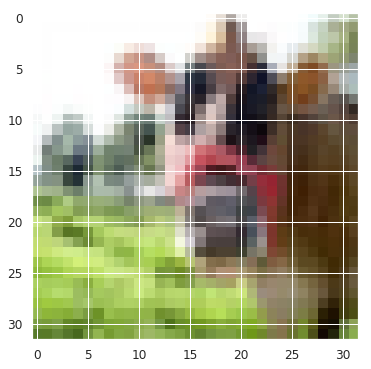

class for image: 49
predicted:         48


In [26]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(vgg16_predicted[0]))

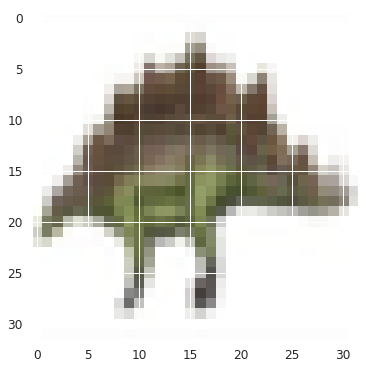

class for image: 33
predicted:         74


In [27]:
imgplot = plt.imshow(x_train_original[1])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(vgg16_predicted[1]))

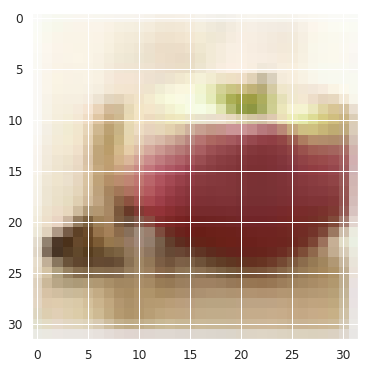

class for image: 72
predicted:         24


In [28]:
imgplot = plt.imshow(x_train_original[2])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(vgg16_predicted[2]))

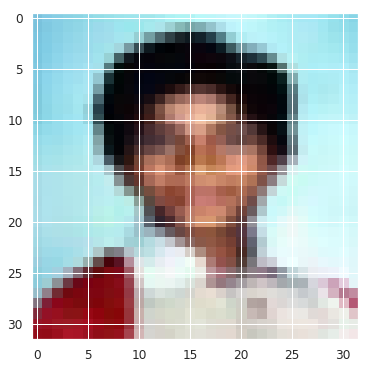

class for image: 51
predicted:         51


In [29]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(vgg16_predicted[3]))

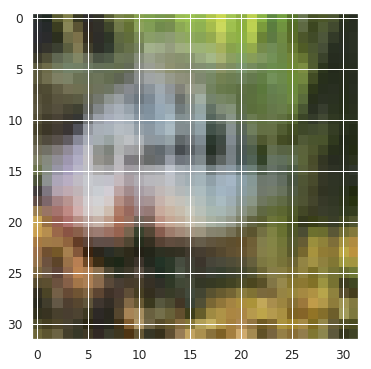

class for image: 71
predicted:         70


In [30]:
imgplot = plt.imshow(x_train_original[4])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(vgg16_predicted[4]))

#### VGG-19

Definimos el modelo y entrenamos de la misma forma que antes con VGG-16.

In [0]:
from keras.applications import vgg19

def create_vgg19():
  model = vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)

  return model

In [0]:
vgg19_model = create_vgg19() 
vgg19_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado.

In [34]:
vgg19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

De 34 millones pasamos a 39 millones. Ahora sólo queda entrenar.

In [35]:
vgg19 = vgg19_model.fit(x=x_train_resized, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test_resized, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 205s 4ms/step - loss: 4.6054 - acc: 0.0091 - mean_squared_error: 0.0099 - val_loss: 4.6052 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 203s 4ms/step - loss: 4.6053 - acc: 0.0089 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 203s 4ms/step - loss: 4.6053 - acc: 0.0093 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0113 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 203s 4ms/step - loss: 4.6053 - acc: 0.0097 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0101 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 203s 4ms/step - loss: 4.6053 - acc: 0.0111 - mean_squared_error: 0.0099 - val_loss: 4.6050 -

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente.

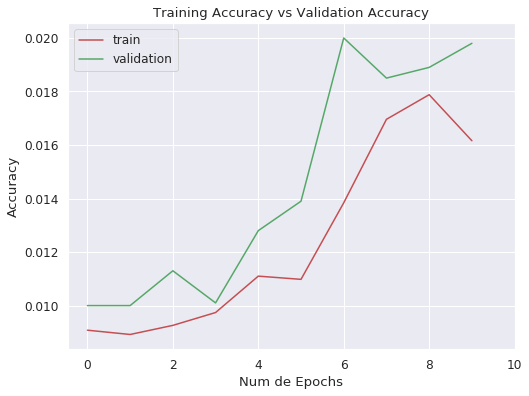

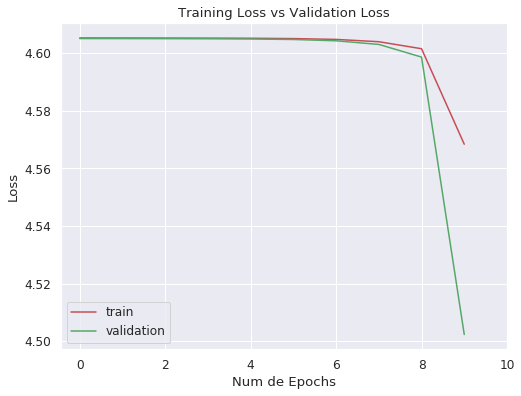

In [36]:
plt.figure(0)  
plt.plot(vgg19.history['acc'],'r')  
plt.plot(vgg19.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg19.history['loss'],'r')  
plt.plot(vgg19.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

La generalización mejora a un 1% aproximadamente respecto a la red convolucional del experimento anterior, si bien, después de 10 epochs no ha mejorado las métricas estándar.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente.

In [37]:
vgg19_pred = vgg19_model.predict(x_test_resized, batch_size=32, verbose=1)  
vgg19_predicted = np.argmax(vgg19_pred, axis=1)

10000/10000 [==============================] - 12s 1ms/step


Como ya hiciéramos en la primera parte, vamos a dar como predecida el mayor valor de la predicción. Lo normal es dar un valor mínimo o bias que defina un resultado como positivo, pero en este caso, lo vamos a hacer simple.

Con la librería Scikit Learn, generamos la matriz de confusión y la dibujamos (aunque el gráfico no es muy bueno debido al numero de etiquetas).

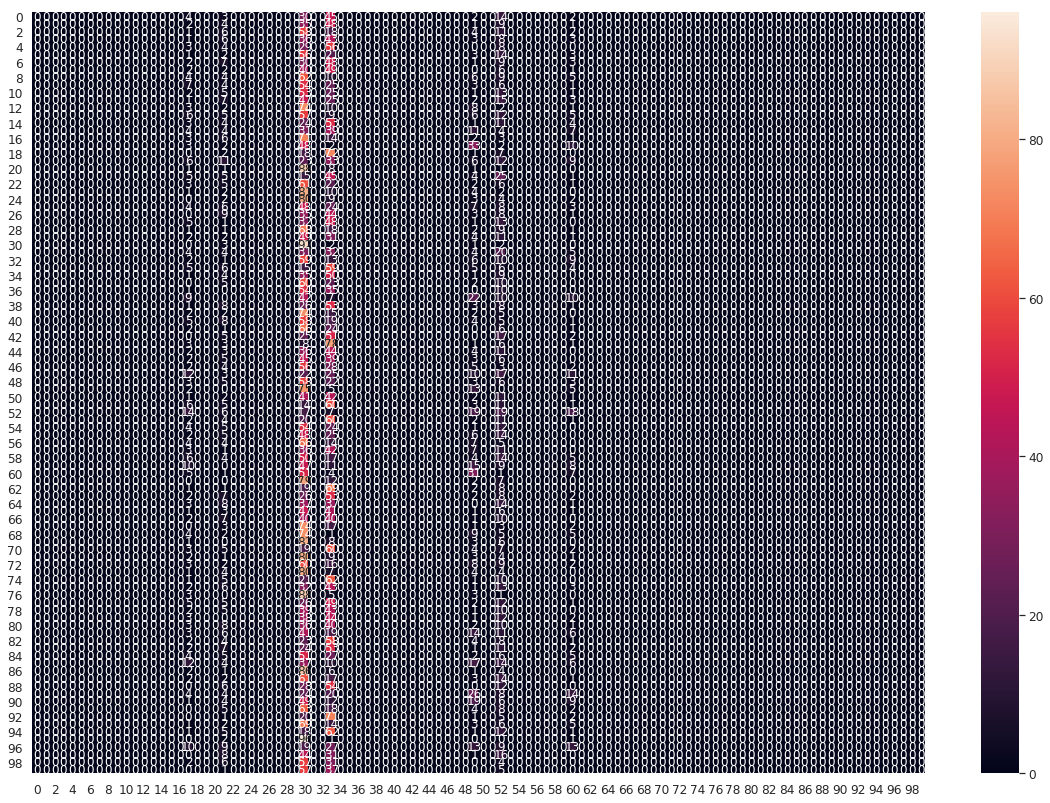

In [38]:
# Creamos la matriz de confusión
vgg19_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg19_predicted)

# Visualiamos la matriz de confusión
vgg19_df_cm = pd.DataFrame(vgg19_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.1) # Tamaño fuente de las etiquetas  
sn.heatmap(vgg19_df_cm, annot=True, annot_kws={"size": 12}) # Tamaño fuente 
plt.show()

Y por último, mostramos las métricas:

In [39]:
vgg19_report = classification_report(np.argmax(y_test, axis=1), vgg19_predicted)  
print(vgg19_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.01    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC:

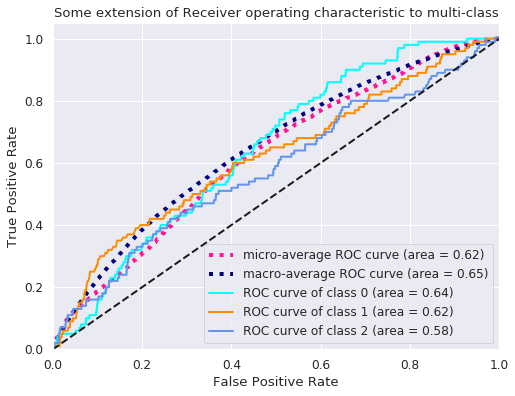

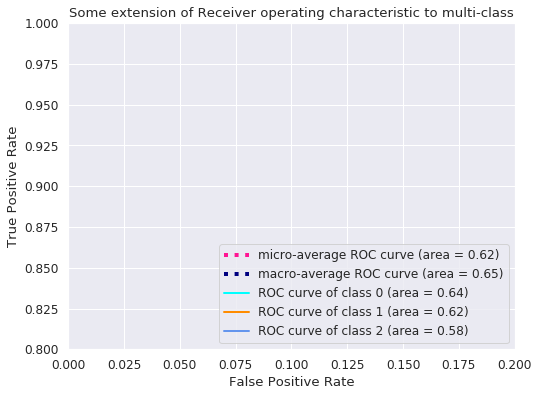

In [40]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg19_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg19_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

Vamos a ver algunos resultados:

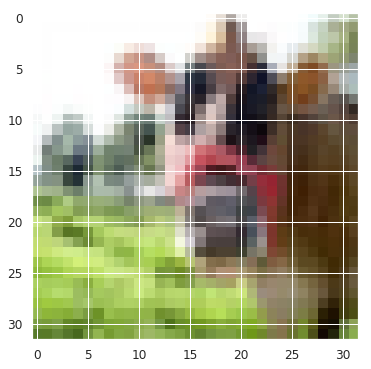

class for image: 49
predicted:         30


In [41]:
imgplot = plt.imshow(x_train_original[0])
plt.show()
print('class for image: ' + str(np.argmax(y_test[0])))
print('predicted:         ' + str(vgg19_predicted[0]))

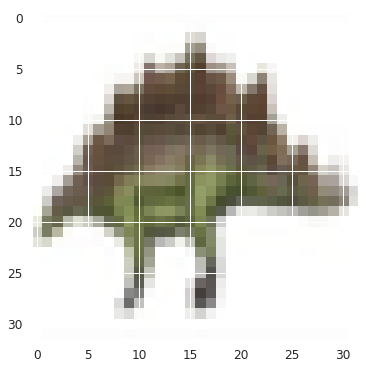

class for image: 33
predicted:         30


In [42]:
imgplot = plt.imshow(x_train_original[1])
plt.show()
print('class for image: ' + str(np.argmax(y_test[1])))
print('predicted:         ' + str(vgg19_predicted[1]))

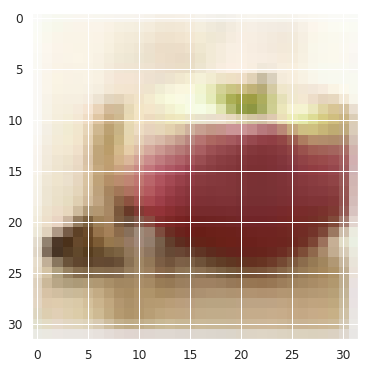

class for image: 72
predicted:         49


In [43]:
imgplot = plt.imshow(x_train_original[2])
plt.show()
print('class for image: ' + str(np.argmax(y_test[2])))
print('predicted:         ' + str(vgg19_predicted[2]))

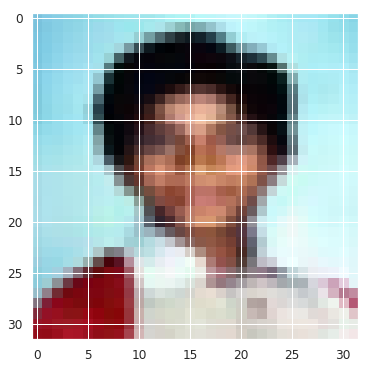

class for image: 51
predicted:         49


In [44]:
imgplot = plt.imshow(x_train_original[3])
plt.show()
print('class for image: ' + str(np.argmax(y_test[3])))
print('predicted:         ' + str(vgg19_predicted[3]))

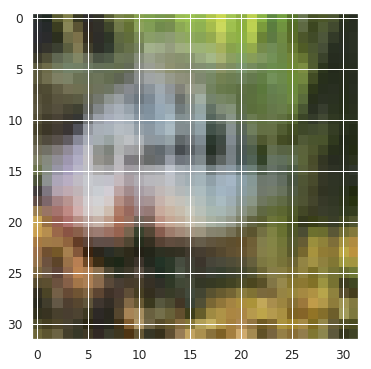

class for image: 71
predicted:         33


In [45]:
imgplot = plt.imshow(x_train_original[4])
plt.show()
print('class for image: ' + str(np.argmax(y_test[4])))
print('predicted:         ' + str(vgg19_predicted[4]))

Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos:

In [0]:
# Histórico
with open(path_base + '/vgg19_history.txt', 'wb') as file_pi:  
  pickle.dump(scnn.history, file_pi)

A continuación, cargaremos las métricas obtenidas de anteriores modelos y los comparamos con los resultados actuales:

In [0]:
with open(path_base + '/vgg16_history.txt', 'rb') as f:  
  vgg16_history = pickle.load(f)

Ya lo tenemos en las variables correspondientes. Ahora, comparemos las gráficas:

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_acc'],'r')  
plt.plot(scnn_history['val_acc'],'g')  
plt.plot(vgg16_history['val_acc'],'b')  
plt.plot(vgg19.history['val_acc'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Simple NN Accuracy vs simple CNN Accuracy")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_loss'],'r')  
plt.plot(scnn_history['val_loss'],'g')  
plt.plot(vgg16.history['val_loss'],'b')  
plt.plot(vgg19.history['val_loss'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Simple NN Loss vs simple CNN Loss")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_mean_squared_error'],'r')  
plt.plot(scnn_history['val_mean_squared_error'],'g')  
plt.plot(vgg16.history['val_mean_squared_error'],'b')  
plt.plot(vgg19.history['val_mean_squared_error'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Simple NN MSE vs simple CNN MSE")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])

## Conclusión

Bien, la respuesta es sencilla. Hemos querido usar un modelo predeterminado, obligándonos a modificar la imagen original haciéndola más grande. Como la imagen es de 32x32 píxeles, pues la imagen resultante queda peor y aprende peor. Esto es, hemos cambiado el ámbito de los datos con respecto a los experimentos anteriores.

En principio, para evaluar el verdadero desempeño del modelo, debemos crear una red VGG que no necesite modificar la imagen original.

#### Red VGG diseñada a medida

Definamos el modelo más específicamente:

In [0]:
def VGG16_Without_lastPool(include_top=True, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=100):  
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)  #to 16x16

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x) #to 8x8

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x) #to 4x4

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x) #to 2x2

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    #x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)


    # Create model.
    model = Model(img_input, x, name='vgg16Bis')

    return model

Compilamos como hasta ahora...

In [0]:
def create_vgg16WithoutPool():  
  model = VGG16_Without_lastPool(include_top=True, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=100)

  return model

vgg16Bis_model = create_vgg16WithoutPool()  
vgg16Bis_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [49]:
vgg16Bis_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

Un tanto preocupante! ahora tenemos un poco más de 40 millones de parámetros, porque en realidad, sólo hemos quitado el Pool del bloque 5. Ahora sólo queda entrenar, pero esta vez con el dataset original normalizado:

In [51]:
x_train = x_train_original/255.0
x_test = x_test_original/255.0

vgg16Bis = vgg16Bis_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 131s 3ms/step - loss: 4.6053 - acc: 0.0090 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0128 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 128s 3ms/step - loss: 4.6053 - acc: 0.0096 - mean_squared_error: 0.0099 - val_loss: 4.6050 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 128s 3ms/step - loss: 4.6052 - acc: 0.0097 - mean_squared_error: 0.0099 - val_loss: 4.6048 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 128s 3ms/step - loss: 4.6048 - acc: 0.0116 - mean_squared_error: 0.0099 - val_loss: 4.6043 - val_acc: 0.0214 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 128s 3ms/step - loss: 4.6038 - acc: 0.0189 - mean_squared_error: 0.0099 - val_loss: 4.6025 -

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

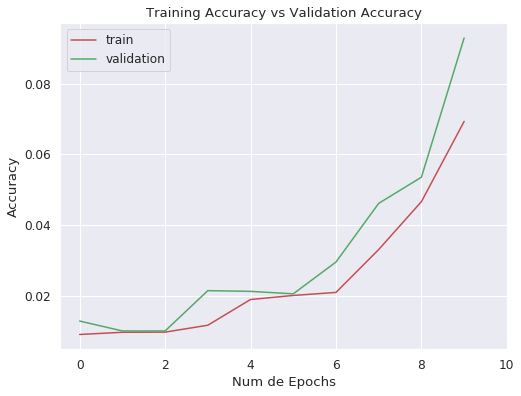

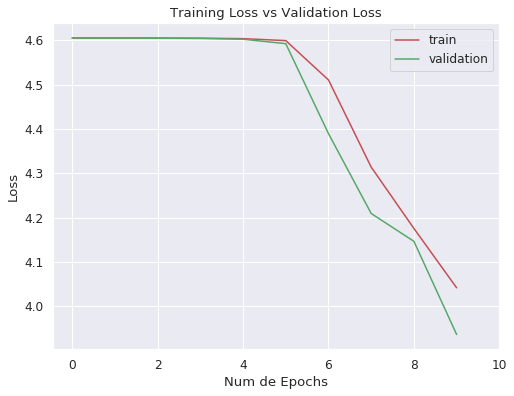

In [52]:
plt.figure(0)  
plt.plot(vgg16Bis.history['acc'],'r')  
plt.plot(vgg16Bis.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg16Bis.history['loss'],'r')  
plt.plot(vgg16Bis.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

Después de 10 epochs no han mejorado las métricas estándar.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

10000/10000 [==============================] - 6s 622us/step


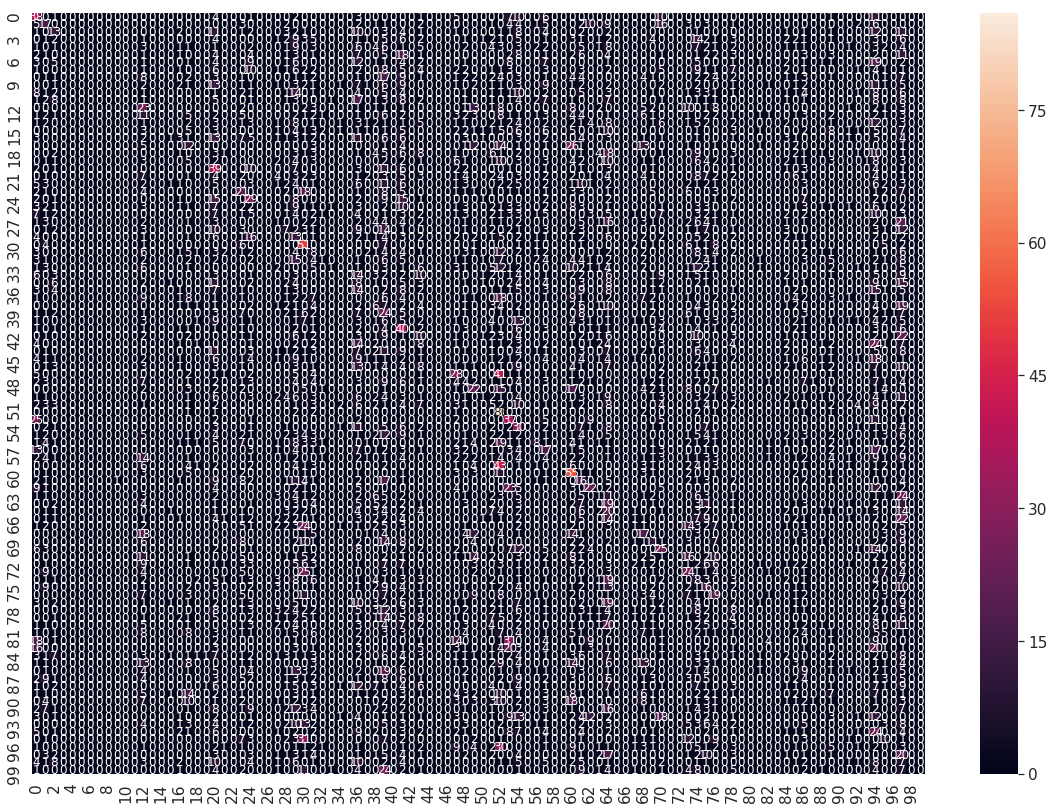

In [53]:
vgg16Bis_pred = vgg16Bis_model.predict(x_test, batch_size=32, verbose=1)  
vgg16Bis_predicted = np.argmax(vgg16Bis_pred, axis=1)

vgg_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg16Bis_predicted)

# Visualizing of confusion matrix
vgg_df_cm = pd.DataFrame(vgg_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

Y por último, mostramos las métricas:

In [54]:
vgg_report = classification_report(np.argmax(y_test, axis=1), vgg16Bis_predicted)  
print(vgg_report)

              precision    recall  f1-score   support

           0       0.15      0.38      0.22       100
           1       0.13      0.17      0.15       100
           2       0.12      0.13      0.13       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.08      0.23      0.12       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.09      0.03      0.04       100
          17       0.09    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar de nuevo la curva ROC:

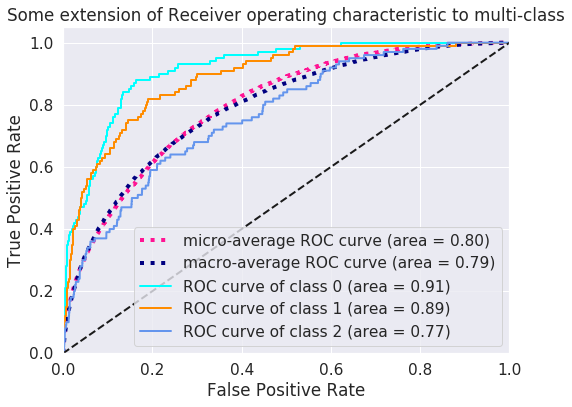

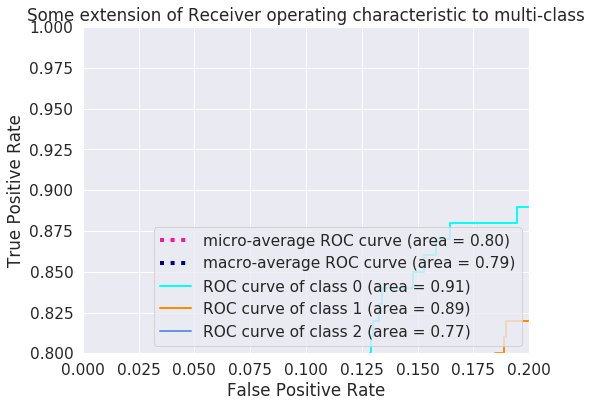

In [55]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg16Bis_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg16Bis_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos:

In [0]:
# Histórico
with open(path_base + '/cvgg16_history.txt', 'wb') as file_pi:  
  pickle.dump(scnn.history, file_pi)

A continuación, vamos a comparar las métricas con los modelos anteriores:

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_acc'],'r')  
plt.plot(scnn_history['val_acc'],'g')  
plt.plot(vgg16.history['val_acc'],'b')  
plt.plot(vgg19.history['val_acc'],'y')  
plt.plot(vgg16Bis.history['val_acc'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Simple NN Accuracy vs simple CNN Accuracy")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_loss'],'r')  
plt.plot(scnn_history['val_loss'],'g')  
plt.plot(vgg16.history['val_loss'],'b')  
plt.plot(vgg19.history['val_loss'],'y')  
plt.plot(vgg16Bis.history['val_loss'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Simple NN Loss vs simple CNN Loss")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])

In [0]:
plt.figure(0)  
plt.plot(snn_history['val_mean_squared_error'],'r')  
plt.plot(scnn_history['val_mean_squared_error'],'g')  
plt.plot(vgg16.history['val_mean_squared_error'],'b')  
plt.plot(vgg19.history['val_mean_squared_error'],'y')  
plt.plot(vgg16Bis.history['val_mean_squared_error'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Simple NN MSE vs simple CNN MSE")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])

### Conclusión final!!!